# **Clustering**

**1. What is Clustering?**

Clustering is an **unsupervised learning** technique that groups data points based on similarity.  
Unlike regression or classification, **there is no dependent variable** — the algorithm itself finds the groups.



**2. Regression vs Classification vs Clustering**

- **Regression**: DV is continuous (e.g., predicting salary).  
- **Classification**: DV is categorical/binary (e.g., spam or not spam).  
- **Clustering**: No DV — only features, and we find groups (clusters) from them.


**3. Types of Clustering**

1. **PCA** — Dimensionality reduction, often used before clustering.  
2. **K-Means** — Centroid-based, fast, requires `K`.  
3. **Hierarchical Clustering** — Tree/dendrogram approach.  
4. **DBSCAN** — Density-based, detects noise and arbitrary-shaped clusters.

In this notebook:
- PCA already completed earlier.
- We now focus on **K-Means** (with manual math + code).

**4. K-Means — Manual Math Example**

Dataset: Student Heights & Weights  

$$
\begin{array}{|c|c|c|}
\hline
\textbf{Student} & \textbf{Height (cm)} & \textbf{Weight (kg)} \\
\hline
S1 & 185 & 72 \\
S2 & 170 & 56 \\
S3 & 168 & 60 \\
S4 & 179 & 68 \\
\hline
\end{array}
$$

**Step 1 — Initialization**
Choose first 2 points as initial centroids:  
$$
\mu_1 = (185, 72), \quad \mu_2 = (170, 56)
$$

**Step 2 — Assignment**
    
For each point, compute Euclidean distance to both centroids:  
$$
d((h_1,w_1),(h_2,w_2)) = \sqrt{(h_1 - h_2)^2 + (w_1 - w_2)^2}
$$  
Assign point to nearest centroid.

**Step 3 — Update**
    
Recalculate centroids as mean of points in each cluster:  
$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$

**Step 4 — Repeat**
    
Continue **Assignment → Update** until centroids stop changing (convergence).


# Manual Example in Python

In [1]:
import numpy as np

# Heights & weights dataset
data = np.array([[185, 72], [170, 56], [168, 60], [179, 68]])

# Initial centroids (first two points)
centroids = np.array([data[0], data[1]])
print("Initial centroids:\n", centroids)

# Compute distances and assign clusters
distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
clusters = np.argmin(distances, axis=1)
print("Cluster assignments:", clusters)

# Update centroids
for k in range(2):
    centroids[k] = data[clusters == k].mean(axis=0)
print("Updated centroids:\n", centroids)


Initial centroids:
 [[185  72]
 [170  56]]
Cluster assignments: [0 1 1 0]
Updated centroids:
 [[182  70]
 [169  58]]


## **Manual K-Means Example — Output Explanation**

**Initial Centroids**  
We chose the first 2 points as starting centers:  
$$
\mu_1 = (185,72), \quad \mu_2 = (170,56)
$$

**Cluster Assignment**  
For each student, we calculate the Euclidean distance:  
$$
d((h_1,w_1),(h_2,w_2)) = \sqrt{(h_1-h_2)^2 + (w_1-w_2)^2}
$$  
Points are assigned to the nearest centroid:  
- Cluster 0 → S1, S4  
- Cluster 1 → S2, S3  

**Centroid Update**  
New centroids = mean of each cluster's points:  
$$
\mu_1 = (182,70), \quad \mu_2 = (169,58)
$$

After 1 iteration: centroids moved closer to the center of their assigned points.  
Repeat **assign → update** until no change (**convergence**).


**Elbow Method Theory**

**5. Elbow Method — Choosing Optimal K**

We want the number of clusters `K` where adding more clusters **doesn't significantly reduce** the **WCSS** (Within-Cluster Sum of Squares).

**Formula for WCSS**:
$$
WCSS = \sum_{k=1}^K \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

**How to interpret the Elbow graph:**
    
- **X-axis**: Number of clusters (K)
- **Y-axis**: WCSS
- The **"elbow point"** is where the curve bends — after this point, adding more clusters gives little gain.

This is our **optimal K**.


# Applying K-Means on Real Data

Now, let's apply K-Means to a real dataset (**Mall_Customers.csv**) to find out  
**which customers belong to which group** based on their **annual income** and **spending score**.  
This will help identify different customer segments for targeted marketing.


## Load CSV & Prepare Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

# Load dataset
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# We'll use Annual Income (3rd col) and Spending Score (4th col)
X = df.iloc[:, [3, 4]].values

## Elbow Method

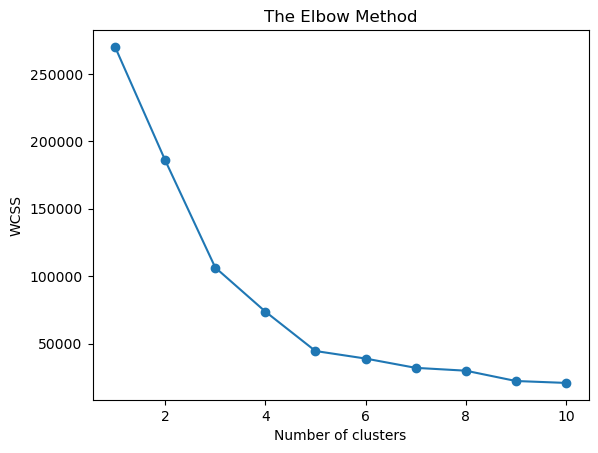

In [5]:
# Elbow Method to find optimal K
#Loop through \(K = 1\) to \(10\), fit K-Means, store **WCSS**, and  
#plot it to visually find the "elbow point" — the optimal number of clusters.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

**How to Read the Elbow Method Graph**

- **X-axis** → Number of clusters (\(K\)) we try.
- **Y-axis** → WCSS (Within-Cluster Sum of Squares), which measures how spread out points are within each cluster.

**Steps to read:**

1. Start at \(K=1\): WCSS is **highest** because all points are in one cluster → very spread out.
2. As \(K\) increases: WCSS **drops quickly** because clusters get smaller and points are closer to their centroids.
3. Look for the **"elbow point"**: where the sharp drop flattens into a gentle slope.
4. The elbow point means **adding more clusters beyond this gives little improvement**.

In this graph, the bend is around **\(K=5\)** → this is the **optimal number of clusters**.


## Choosing K

From the Elbow graph, we select **K=5** as it gives the best balance —  
beyond this, WCSS reduction is minimal.


## Fit K-Means & Predict

In [6]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
y_kmeans = kmeans.fit_predict(X)

## Plot Clusters

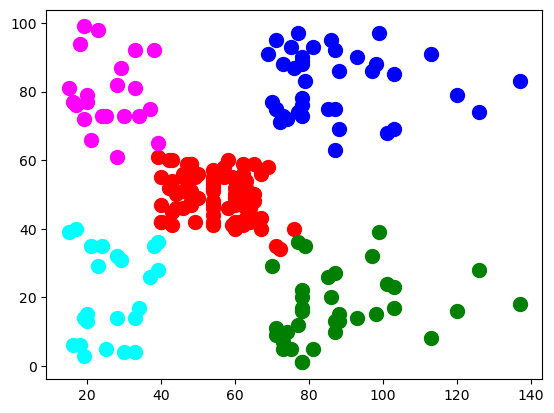

In [7]:
# Plot each cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

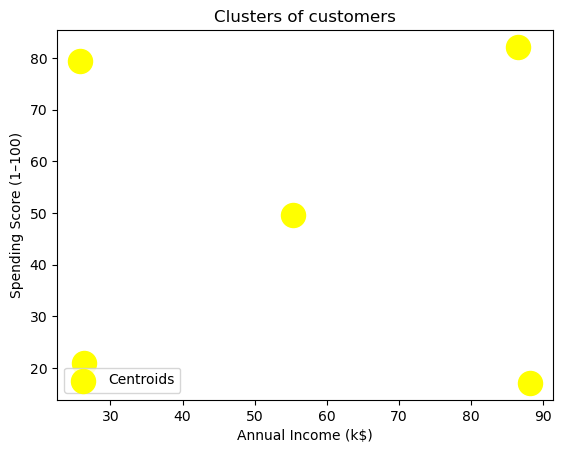

In [8]:
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()

## Plot Clusters with centroids

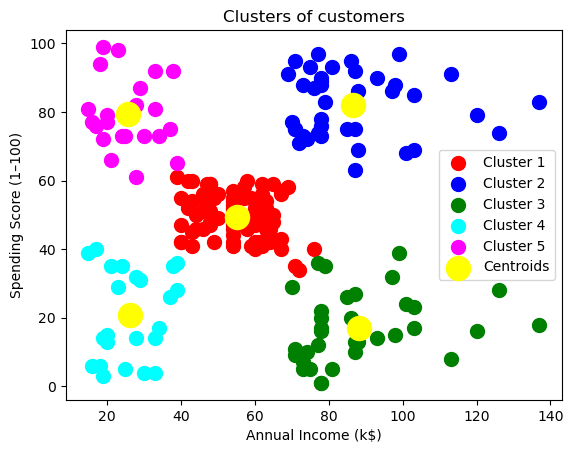

In [9]:
# Plot each cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()


**Customer Segmentation Output**

The scatter plot shows **5 customer clusters** formed using K-Means based on  
**Annual Income (X-axis)** and **Spending Score (Y-axis)**.

- **Colors** represent different customer groups with similar spending & income patterns.
- **Yellow dots** = Centroids (center points of each cluster).
- Customers in the same cluster are **more similar** to each other than to customers in other clusters.

Example:

- **Pink cluster** → Low income, high spending.
- **Green cluster** → High income, low spending.
- **Blue cluster** → High income, high spending.


## Save Clustered Data

In [10]:
df['Cluster'] = y_kmeans
df.to_csv("clustered_data.csv", index=False)
print("Clustered data saved.")

Clustered data saved.


## Load Saved Data

In [11]:
import os
print("Saved at:", os.getcwd())

df1 = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Python Everyday work\Github work\clustered_data.csv")
df1.head()


Saved at: C:\Users\Lenovo\OneDrive\Desktop\Python Everyday work\Github work


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


## Summary

- Understood difference between regression, classification, and clustering.  
- Learned K-Means math and manual working.  
- Applied Elbow Method to select optimal K.  
- Built and visualized customer clusters from Mall_Customers dataset.  
- Saved final results for further use.
